In [1]:
library(MASS)
library(ISLR)
library(car)
library(leaps)
library(glmnet)

Loading required package: carData

Loading required package: Matrix

Loaded glmnet 4.1-2



# Simple Linear Regression

## Simple linear fit and summary

### Boston dataset

**Variables:**

rm = Average number of rooms per house

age = Average age of houses

lstat = Percent of households with low socioeconomic status

...

**What we want to predict:**

medv = Median house value

[1] "Variable names:"


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

[1] "Coefficient summary:"



Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


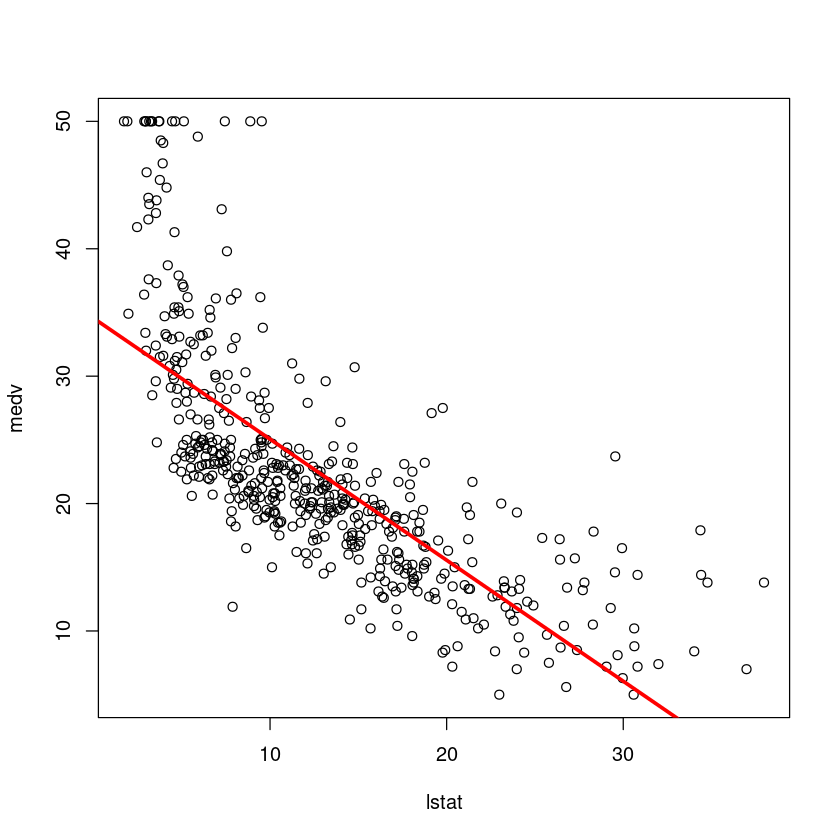

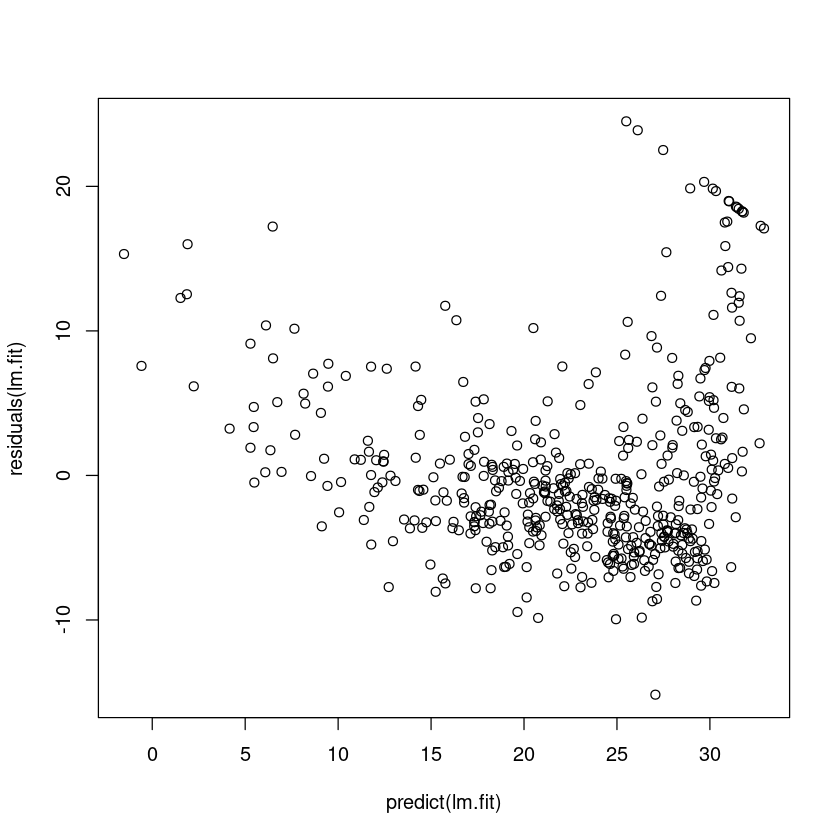

In [2]:
# Linear fit
print('Variable names:')
names(Boston)
attach(Boston)
lm.fit=lm(medv~lstat)

#Plot
plot(lstat,medv)
abline(lm.fit,lwd=3,col="red")

#Summarize variables
print('Coefficient summary:')
summary(lm.fit)

#Residuals
plot(predict(lm.fit), residuals(lm.fit))

**Coefficient standard errors:**
- We assume that errors are uncorrelated and have common variance

**t-value and Pr(>|t|)**
- t-value = Number of standard deviations that coefficient is away from 0
- Large t-value $\implies$ coefficient is important in model
- p-value = Pr(>|t|)
- Small p-value $\implies$ coefficient is important in model

**RSS and RSE:**
- RSS is the sum of squared residuals
- The Residual standard error: $ RSE = \sqrt{\frac{RSS}{n-2}} $
- RSE is an estimate of the standard deviation of $\epsilon$
- RSE measures lack of fit of model

**Adjusted $R^2$ and $R^2$:**
- $R^2$ also measures measure of fit
- $R^2$ measures the proportion of variance explained by the model
- In simple regression, this is just the correlation squared of x and y
- Adjusted $R^2$ takes into account the number of features. 

**F-statistic:**
- The larger $F$, the more likely that at least one coefficient is important
- If all coefficeints might as well be zero, then $F\approx 1$

## Multiple linear regression fit and summary

In [3]:
# Multiple Linear Regression (lstat and age)

lm.fit=lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


## Higher dimensional multiple linear regression fit and summary

In [4]:
# Multiple Linear Regression (all features)
lm.fit=lm(medv~.,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

## Interaction terms

In [5]:
# Interaction Terms
summary(lm(medv~lstat*age,data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


# Ridge and Lasso

## Ridge

### Hitters dataset
$y =$ salary

In [6]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

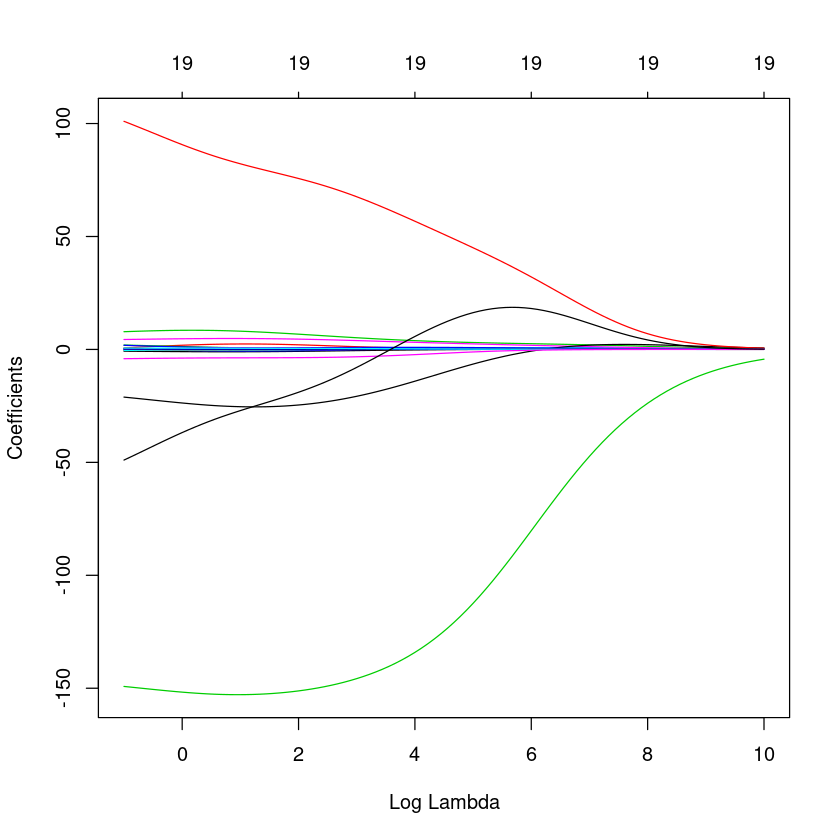

In [7]:
x=model.matrix(Salary~.,Hitters)[,-1]
y=na.omit(Hitters$Salary)

#Split into test and traing
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]

# Ridge Regression
grid=exp(1)^seq(10,-1,length=100)
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid)
plot(ridge.mod, "lambda")

## Lasso

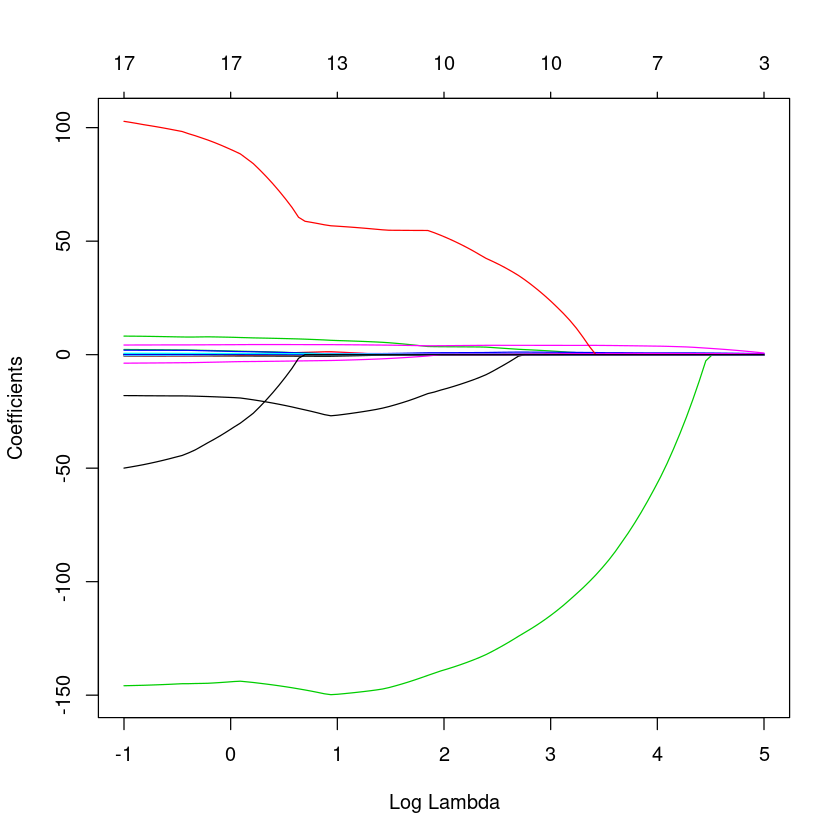

In [8]:
# The Lasso
grid=exp(1)^seq(5,-1,length=100)
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod, "lambda")

**Differences:**
- Ridge has non-zero coefficients for each $\lambda$
- Lasso has many zero coefficients

<!-- # Subset selectin -->

# Subset selection

## Best subset selection

In [9]:
# Best Subset Selection
Hitters=na.omit(Hitters)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

#Print R^2
reg_summary = summary(regfit.full)
print('R^2 values for each p')
reg_summary$rsq

#Print adjusted R^2
print('Adjusted R^2 values for each p')
reg_summary$adjr2

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

[1] "R^2 values for each p"


[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
[8] 0.5285569

[1] "Adjusted R^2 values for each p"


[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
[8] 0.5137083

- Outputs best subset of features for $p = 1,\dots, 8$
- Why do some features go away?

## Forward stepwise selection

- We start with a model with NO features!
- We fit p models and choose the first feature which has the lowest training error
- We we choose the next features the same way
- We stop after a while (how?)
- What type of algorithm is this?

In [10]:
# Forward Stepwise Selection
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

## Backward stepwise selection

- We start with a model with all the features!
- We fit remove the feature which has the lowest p-value
- We remove the next features the same way
- We stop after a while (how?)

In [11]:
# Backward Stepwise Selection
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 
